In [146]:
import subprocess
import os,sys
proj_root = os.path.split(os.getcwd())[0]
if proj_root not in sys.path:
    sys.path.append(proj_root)
import convert

timer = convert.probe()

print("Done at ", (timer.end - timer.start)/1000, "s")
# subprocess.check_output(['python', '-mstruct', ' ../convert/to_sas.py'])

Done at  0.003 s


In [169]:
variables = []
timers = []
conversion_time = []
algorithm_time = []
for json in [0, 1, 2]:
    timer = convert.probe()

    print("Convertion done at ", (timer.end - timer.start)/1000, "s")
    convert_time = (timer.end - timer.start)/1000

    command = '~/Downloads/downward/fast-downward.py ' + \
        '~/project/diploma/visualisation/output_sample.sas' + \
        ' --heuristic "hff=ff()" --search "lazy_greedy([hff], preferred=[hff])"'
    output,error  = subprocess.Popen(
                        command, universal_newlines=True, shell=True,
                        stdout=subprocess.PIPE, stderr=subprocess.PIPE).communicate()
    #print(output)
    variables_num = int(output[output.find("Variables: "):].splitlines()[0].split()[-1])
    print("Number of nodes: ", variables_num)
    begin = output.find("Total time: ")
    just_time = float(str(output[begin:]).splitlines()[0].split()[-1][:-1])
    print("Algorithm found solution at ", just_time, "s")
    print()
    variables.append(variables_num)
    conversion_time.append(convert_time)
    algorithm_time.append(just_time)
    timers.append(just_time + convert_time)

Convertion done at  0.015 s
Number of nodes:  7
Algorithm found solution at  0.00170802 s

Convertion done at  0.005 s
Number of nodes:  7
Algorithm found solution at  0.00137592 s

Convertion done at  0.002 s
Number of nodes:  7
Algorithm found solution at  0.00155468 s



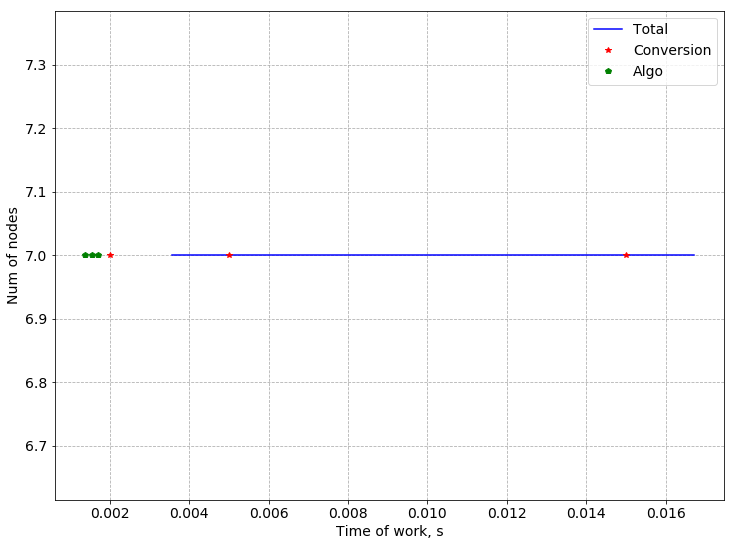

In [175]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import datetime

matplotlib.rcParams.update({'font.size': 14})

# timers = [datetime.datetime.fromtimestamp(t*1000) for t in timers]
plt.figure(figsize=(12,9))
plt.plot(timers, variables, 'b-', label="Total")
plt.plot(conversion_time, variables, 'r*', label="Conversion")
plt.plot(algorithm_time, variables, 'gp', label="Algo")
plt.xlabel("Time of work, s")
plt.ylabel("Num of nodes")
plt.legend()
plt.grid(linestyle="--")